Content and things to discuss are up to you, but we expect (at a minimum):
- Do you have data fully in hand and if not, what blockers are you facing? A: YES
- Have you done a full EDA on all of your data? A: YES
- Have you begun the modeling process? How accurate are your predictions so far? A: NO
- What blockers are you facing, including processing power, data acquisition, modeling difficulties, data cleaning, etc.? How can we help you overcome those challenges? A: figuring out how I want to model it
- Have you changed topics since your lightning talk? Since you submitted your Problem Statement and EDA? If so, do you have the necessary data in hand (and the requisite EDA completed) to continue moving forward? A: NO 
- What is your timeline for the next week and a half? What do you have to get done versus what would you like to get done? A: Figuring out my target and building the model 
- What topics do you want to discuss during your 1:1? A: Project Goals and suggestions

# CAPSTONE PROJECT NOTEBOOOK - PATRICK VALADKA

#https://git.generalassemb.ly/DSI-EAST-1/capstone
-Goal of this project is to predict crime type, location, and date based on the available data

-Chose this dataset vs the other because it was more complete in terms of location, crime, and offenses
-Key columns we're looking at will include: GO Report Date (LabelEncoded day of week and months)
        - GO Highest Offense Desc  [OR]  Highest NIBRS/UCR Offense Description  [label encoded]
        - GO Location Zip for [regression?] about generalized locations of crime [rape/sexual assualt obscured]
        - GO X Coordinate and GO Y Coordinate for location precision for mapping in Tableau  
        
- Use regression(?) around the types of crime, date, and location to establish a crime set to improve APD patrolling
- Motivation: I got broken into and want to determine the ideal location to move to in the near future

In [169]:
# importing some initial plotting tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV, LassoCV, Ridge, RidgeCV
# importing packages for running models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV, LassoCV, Ridge, RidgeCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import PassiveAggressiveClassifier
from datetime import datetime
from time import gmtime, strftime
%matplotlib inline

In [202]:
# importing dataset and getting some head
# chose this dataset vs the other because it was more complete in terms of location, crime, and offenses
df = pd.read_csv('./2016_Annual_Crime_Data.csv')
df.head(50)

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735.0,19.08,3067322.0,10062796.0
1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701.0,11.00,3114957.0,10070462.0
2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,3129181.0,10106923.0
3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701.0,11.00,3113643.0,10070357.0
4,2.016110e+08,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,NaN,C,10-Mar-16,E,78753.0,18.33,NaN,NaN
5,2.016111e+08,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724.0,22.08,3146947.0,10077985.0
6,2.016112e+08,3.0,ROBBERY BY ASSAULT,Robbery,1-Jan-16,1601 ROYAL CREST DR ...,N,1-Nov-16,H,78741.0,23.16,3118667.0,10060221.0
7,2.016112e+08,3.0,AGG ASSAULT FAM/DATE VIOLENCE,Agg Assault,1-Jan-16,1600 WICKERSHAM LN ...,C,1-Jan-16,H,78741.0,23.18,3122230.0,10059265.0
8,2.016112e+08,5.0,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,1-Jan-16,4009 VICTORY DR ...,C,3-Feb-16,D,78704.0,20.04,3099793.0,10058337.0
9,2.016112e+08,5.0,BURGLARY NON RESIDENCE,Burglary,1-Jan-16,811 W SLAUGHTER LN ...,N,4-Feb-16,F,78748.0,24.21,3095553.0,10035959.0


In [203]:
df.shape

(37461, 13)

In [7]:
df['Highest NIBRS/UCR Offense Description'].value_counts()

Theft          26241
Burglary        5171
Agg Assault     2177
Auto Theft      2025
Robbery         1050
Rape             759
Murder            38
Name: Highest NIBRS/UCR Offense Description, dtype: int64

In [8]:
df['GO Highest Offense Desc'].value_counts()

THEFT                             10442
BURGLARY OF VEHICLE                8505
THEFT BY SHOPLIFTING               3424
BURGLARY OF RESIDENCE              3196
AUTO THEFT                         2025
BURGLARY NON RESIDENCE             1649
THEFT OF BICYCLE                   1392
AGG ASSAULT                         902
THEFT FROM AUTO                     656
AGG ASLT STRANGLE/SUFFOCATE         609
AGG ROBBERY/DEADLY WEAPON           582
THEFT OF LICENSE PLATE              475
THEFT FROM PERSON                   451
ROBBERY BY ASSAULT                  358
AGG ASSAULT FAM/DATE VIOLENCE       335
BURG NON RESIDENCE SHEDS            316
RAPE                                288
THEFT OF AUTO PARTS                 286
THEFT FROM BUILDING                 249
THEFT OF TRAILER                    163
DEADLY CONDUCT                      146
SEXUAL ASSAULT W/ OBJECT            119
SEXUAL ASSAULT OF CHILD/OBJECT      115
BREACH OF COMPUTER SECURITY          98
RAPE OF A CHILD                      94


/Users/Owner/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/Owner/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


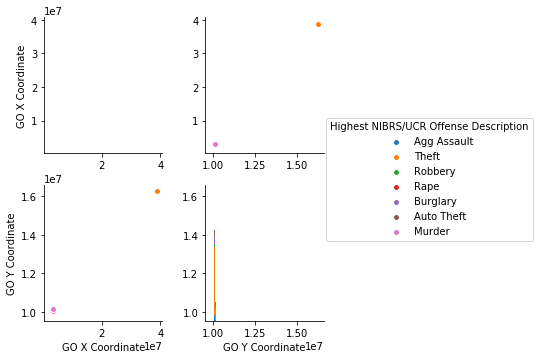

In [9]:
sns.pairplot(df[['GO Highest Offense Desc','GO X Coordinate','GO Y Coordinate','Highest NIBRS/UCR Offense Description']],hue='Highest NIBRS/UCR Offense Description');

/Users/Owner/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/Owner/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


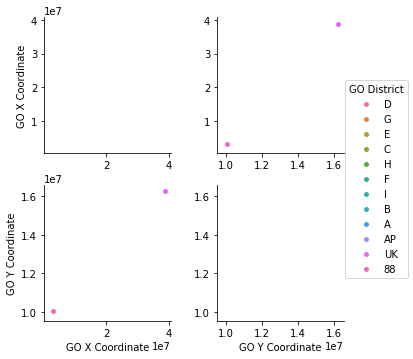

In [10]:
sns.pairplot(df[['GO Highest Offense Desc','GO X Coordinate','GO Y Coordinate','GO District']],hue='GO District');

In [11]:
df['GO District'].value_counts()

D     5448
E     4784
F     4500
B     4273
H     4264
I     4252
A     4146
C     2825
G     2645
AP     162
UK     136
88      26
Name: GO District, dtype: int64

In [201]:
df.shape

(34885, 20)

In [12]:
df.loc[df['GO District'] == '88']

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
1356,2.016500e+10,NaN,THEFT,Theft,14-Jan-16,12005 MANAROLA CV ...,NaN,NaN,88,78653.0,18.56,3158080.0,10103648.0
1900,2.016500e+10,10.0,THEFT,Theft,19-Jan-16,4102 AQUA VERDE DR ...,NaN,NaN,88,78746.0,19.12,3092173.0,10097439.0
2823,2.016280e+09,NaN,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,28-Jan-16,7430 BLUFF SPRINGS RD ...,C,3-Feb-16,88,78744.0,24.27,3106403.0,10037968.0
5486,2.016540e+09,NaN,BURGLARY NON RESIDENCE,Burglary,23-Feb-16,13614 DESSAU RD ...,N,24-Feb-16,88,78660.0,18.40,3146377.0,10121533.0
6170,2.016501e+10,2.0,AUTO THEFT,Auto Theft,1-Mar-16,7204 GREAT PANDA CV ...,N,28-Mar-16,88,78617.0,24.35,3146290.0,10030743.0
7105,2.016702e+09,NaN,BURGLARY OF VEHICLE,Theft,10-Mar-16,15505 N IH 35 SVRD NB ...,N,20-Mar-16,88,78660.0,18.57,3136965.0,10137452.0
10983,2.016502e+10,2.0,THEFT,Theft,15-Apr-16,7100 CARDINAL BLOOM LOOP ...,NaN,NaN,88,78744.0,24.32,3122068.0,10032912.0
13927,2.016800e+10,NaN,THEFT,Theft,13-May-16,1201 CHARRINGTON DR ...,N,16-Jun-16,88,78664.0,215.05,3136921.0,10162834.0
17784,2.016503e+10,NaN,THEFT BY SHOPLIFTING,Theft,20-Jun-16,4970 W US 290 HWY SVRD WB ...,NaN,NaN,88,78735.0,19.15,3090168.0,10057831.0
18097,2.016175e+10,NaN,SEXUAL ASSAULT OF CHILD/OBJECT,Rape,23-Jun-16,NaN,N,24-Jun-16,88,78724.0,22.02,NaN,NaN


In [13]:
# checking out null values of columns
df.isnull().sum()

GO Primary Key                              0
Council District                          256
GO Highest Offense Desc                     0
Highest NIBRS/UCR Offense Description       0
GO Report Date                              0
GO Location                               759
Clearance Status                         1719
Clearance Date                           1719
GO District                                 0
GO Location Zip                           167
GO Census Tract                           167
GO X Coordinate                           867
GO Y Coordinate                           867
dtype: int64

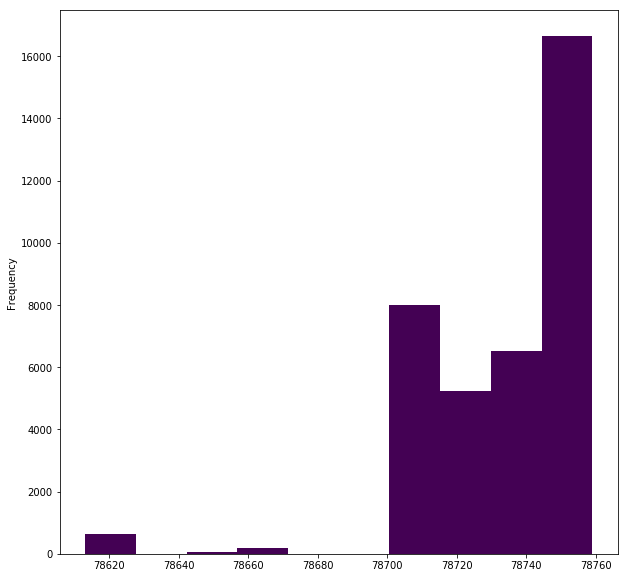

In [14]:
# plotting histogram to determine zip codes as a factor related to crime stats
plt.figure(figsize=(10,10))
df['GO Location Zip'].plot(kind='hist', colormap='viridis')
# inherently round rock and westlake have 0 data as they are other cities.. 
# did not expect much impact from these two anyway as they are relatively safe.
# need to get it into each zip code...

In [15]:
# plot location based crime

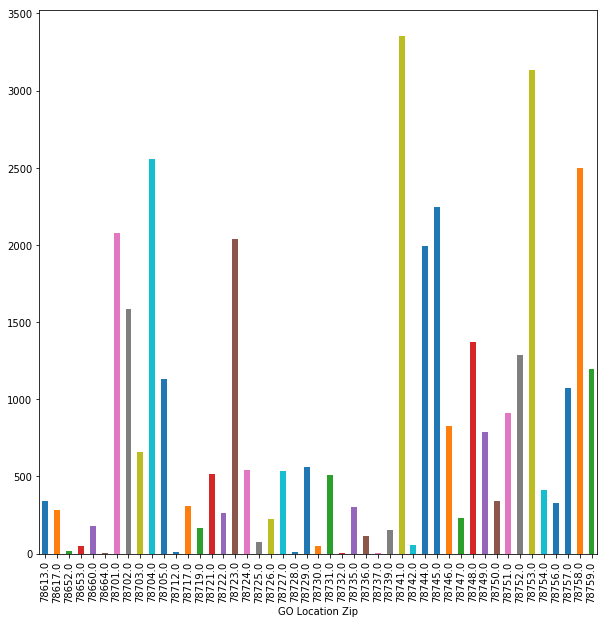

In [16]:
plt.figure(figsize=(10,10))
df.groupby('GO Location Zip').size().plot(kind='bar')
plt.show()

# START TRANSFORMING DATA 
- drop all the nulls for the GO Location Zip, GO Census Tract, GO X Coordinate, GO Y Coordinate
- drop the GO Primary Key and Clearance Date columns because they are basically useless
- create LabelEncoder columns for the days and months on the dataset
- change all NaN values for the Clearance Status to "N" 
- drop the .0 value off of the Go Location Zip column

In [ ]:
# drop the GO Primary Key and Clearance Date columns because they are basically useless
#df.drop(['GO Primary Key','Clearance Date'], axis=1, inplace=True)

In [ ]:
df.head(2)

In [18]:
# drop the na values from Zip
#df.dropna(subset = ['column_name'])
df.dropna(subset = ['GO Location Zip'],how='all', inplace = True)

In [19]:
# transforming the zip location
df['GO Location Zip'] =  df['GO Location Zip'].astype('int32')

In [20]:
#recheck all nan are gone
df['GO Location Zip'].isnull().sum()

0

In [21]:
df.head(2)

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,19.08,3067322.0,10062796.0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,11.00,3114957.0,10070462.0


In [22]:
# drop the na values from X and Y coordinate
#df.dropna(subset = ['column_name'])
df.dropna(subset = ['Council District'],how='all', inplace = True)

In [23]:
df.isnull().sum()

GO Primary Key                              0
Council District                            0
GO Highest Offense Desc                     0
Highest NIBRS/UCR Offense Description       0
GO Report Date                              0
GO Location                               713
Clearance Status                         1647
Clearance Date                           1647
GO District                                 0
GO Location Zip                             0
GO Census Tract                             0
GO X Coordinate                           713
GO Y Coordinate                           713
dtype: int64

In [24]:
df.dropna(subset = ['GO X Coordinate','GO Y Coordinate'],how='all', inplace = True)

In [25]:
df.dropna(subset = ['Clearance Status'],how='all', inplace = True)

In [ ]:
df.head(1000)
# 0= monday
# 1= tuesday
# 2= wednesday
# 3= thursday
# 4= friday
# 5= saturday 
# 6= sunday

In [26]:
# converting the GO Report Date to day, month
# 0 index starting on monday
df['weekday'] = pd.DatetimeIndex(df['GO Report Date']).dayofweek

In [27]:
df['new_date'] = pd.to_datetime(df['GO Report Date'])
#pd.Timestamp(df.new_date[0]).dayofweek


4

In [204]:
# transform date to datetime for day of week of 'Go Report Date'

df['dow']=df['new_date'].dt.dayofweek

df.head()

KeyError: 'new_date'

In [29]:
df['Day_of_Week'] = pd.to_datetime(df['new_date'], format='%y/%m/%d').dt.weekday_name

df.head(1000)

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,new_date,dow,Day_of_Week
0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,19.08,3067322.0,10062796.0,4,2016-01-01,4,Friday
1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,11.00,3114957.0,10070462.0,4,2016-01-01,4,Friday
2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,18.23,3129181.0,10106923.0,4,2016-01-01,4,Friday
3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,11.00,3113643.0,10070357.0,4,2016-01-01,4,Friday
5,2.016111e+08,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,22.08,3146947.0,10077985.0,4,2016-01-01,4,Friday
6,2.016112e+08,3.0,ROBBERY BY ASSAULT,Robbery,1-Jan-16,1601 ROYAL CREST DR ...,N,1-Nov-16,H,78741,23.16,3118667.0,10060221.0,4,2016-01-01,4,Friday
7,2.016112e+08,3.0,AGG ASSAULT FAM/DATE VIOLENCE,Agg Assault,1-Jan-16,1600 WICKERSHAM LN ...,C,1-Jan-16,H,78741,23.18,3122230.0,10059265.0,4,2016-01-01,4,Friday
8,2.016112e+08,5.0,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,1-Jan-16,4009 VICTORY DR ...,C,3-Feb-16,D,78704,20.04,3099793.0,10058337.0,4,2016-01-01,4,Friday
9,2.016112e+08,5.0,BURGLARY NON RESIDENCE,Burglary,1-Jan-16,811 W SLAUGHTER LN ...,N,4-Feb-16,F,78748,24.21,3095553.0,10035959.0,4,2016-01-01,4,Friday
10,2.016113e+08,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-16,8930 GALEWOOD DR ...,C,12-Feb-16,E,78758,18.20,3121931.0,10106738.0,4,2016-01-01,4,Friday


In [30]:
df.loc[df['GO Report Date'] == '3-Jan-16']


,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,new_date,dow,Day_of_Week
160,2.016214e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,3-Jan-16,907 E ST JOHNS AVE ...,C,27-Apr-16,I,78752,18.12,3126837.0,10094024.0,6,2016-01-03,6,Sunday
161,2.016300e+08,5.0,THEFT,Theft,3-Jan-16,1342 LAMAR SQUARE DR ...,N,5-Jan-16,D,78704,13.03,3107726.0,10065373.0,6,2016-01-03,6,Sunday
162,2.016300e+08,1.0,AGG ASSAULT,Agg Assault,3-Jan-16,11100 BLOCK N IH 35 SVRD NB ...,N,26-Feb-16,E,78753,18.33,3134137.0,10110134.0,6,2016-01-03,6,Sunday
163,2.016301e+08,3.0,AGG ASSAULT,Agg Assault,3-Jan-16,N IH 35 SVRD NB / E CESAR CHAVEZ ST ...,N,30-Jun-16,G,78702,9.02,3116588.0,10068234.0,6,2016-01-03,6,Sunday
164,2.016301e+08,3.0,BURGLARY OF VEHICLE,Theft,3-Jan-16,2425 ELMONT DR ...,C,3-Jan-16,H,78741,23.04,3121195.0,10060509.0,6,2016-01-03,6,Sunday
165,2.016301e+08,2.0,AGG ASSAULT,Agg Assault,3-Jan-16,4509 E ST ELMO RD ...,N,4-Jan-16,F,78744,24.13,3116165.0,10048034.0,6,2016-01-03,6,Sunday
166,2.016301e+08,7.0,THEFT,Theft,3-Jan-16,2600 GRACY FARMS LN ...,N,19-Jan-16,A,78758,18.49,3123063.0,10120908.0,6,2016-01-03,6,Sunday
167,2.016302e+08,1.0,THEFT,Theft,3-Jan-16,1815 CORONADO HILLS DR ...,N,13-Jan-16,I,78752,18.11,3132414.0,10091710.0,6,2016-01-03,6,Sunday
168,2.016302e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,3-Jan-16,1100 REINLI ST ...,N,3-May-16,I,78723,21.05,3126350.0,10088845.0,6,2016-01-03,6,Sunday
169,2.016304e+08,4.0,THEFT,Theft,3-Jan-16,1030 NORWOOD PARK BLVD ...,C,22-Jan-16,I,78753,18.13,3129997.0,10096983.0,6,2016-01-03,6,Sunday


In [33]:
df['Day_of_Week'].head()

0    Friday
1    Friday
2    Friday
3    Friday
5    Friday
Name: Day_of_Week, dtype: object

In [34]:
df.loc[df['Day_of_Week'] == 'Saturday'].count()

GO Primary Key                           4206
Council District                         4206
GO Highest Offense Desc                  4206
Highest NIBRS/UCR Offense Description    4206
GO Report Date                           4206
GO Location                              4206
Clearance Status                         4206
Clearance Date                           4206
GO District                              4206
GO Location Zip                          4206
GO Census Tract                          4206
GO X Coordinate                          4206
GO Y Coordinate                          4206
weekday                                  4206
new_date                                 4206
dow                                      4206
Day_of_Week                              4206
dtype: int64

In [35]:
df.loc[df['Day_of_Week'] == 'Tuesday'].count()

GO Primary Key                           5275
Council District                         5275
GO Highest Offense Desc                  5275
Highest NIBRS/UCR Offense Description    5275
GO Report Date                           5275
GO Location                              5275
Clearance Status                         5275
Clearance Date                           5275
GO District                              5275
GO Location Zip                          5275
GO Census Tract                          5275
GO X Coordinate                          5275
GO Y Coordinate                          5275
weekday                                  5275
new_date                                 5275
dow                                      5275
Day_of_Week                              5275
dtype: int64

In [36]:
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2016, 12, 31)
end_date = date(2017, 1, 1)
for single_date in daterange(start_date, end_date):
    print(single_date.strftime("%Y-%m-%d"))

2016-12-31


In [37]:
#df['weekday_name'] = df['weekday'].dt.weekday_name

In [38]:
df["Month"]=df["GO Report Date"].map(lambda x: x.split("-")[1])
df["Year"]=df["GO Report Date"].map(lambda x: x.split("-")[2])
df["Day"]=df["GO Report Date"].map(lambda x: x.split("-")[0])

In [ ]:
#Make my months, day and years into ints than strings.
#df['Month'] = df['Month'].astype(str).astype(int)
#df['Day'] = df['Day'].astype(str).astype(int)
#df['Year'] = df['Year'].astype(str).astype(int)

In [ ]:
#.map current val jan maps ton one
#df[month_num] = df.Month.str.upper().map()

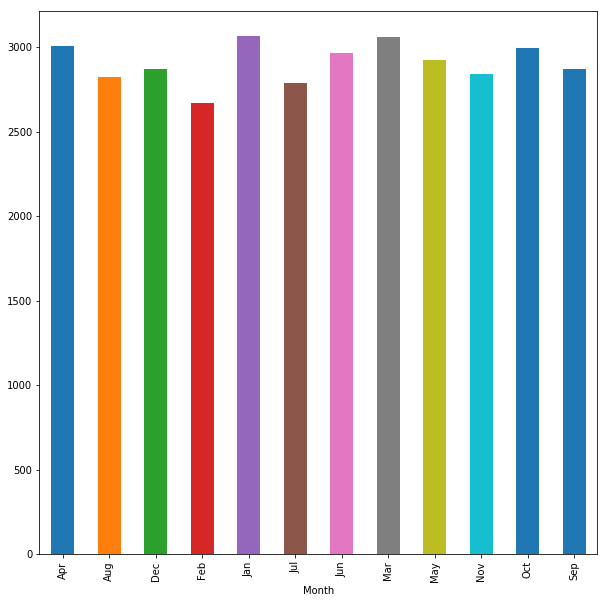

In [39]:
plt.figure(figsize=(10,10))
df.groupby('Month').size().plot(kind='bar')
plt.show()

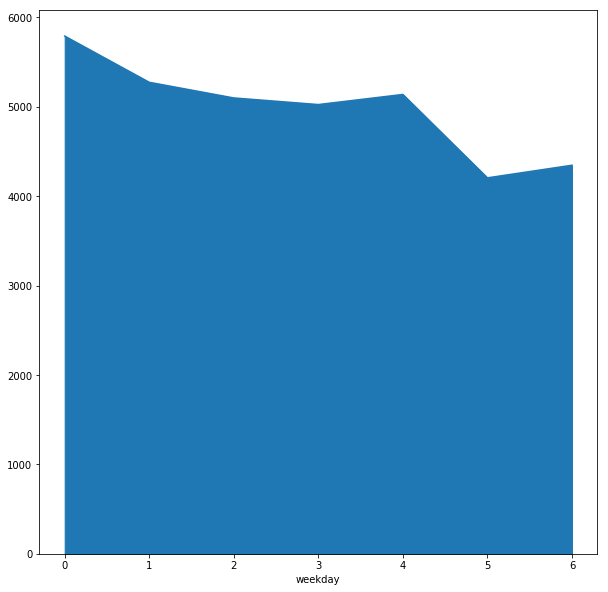

In [40]:
# starting at 0 = monday to 6 = sunday
plt.figure(figsize=(10,10))
df.groupby('weekday').size().plot(kind='area')
plt.show()

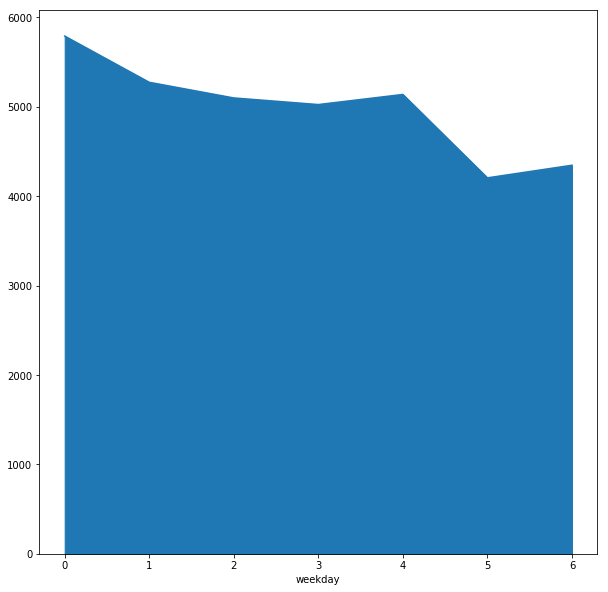

In [41]:
# starting at 0 = monday to 6 = sunday
plt.figure(figsize=(10,10))
df.groupby('weekday').size().plot(kind='area')
plt.show()

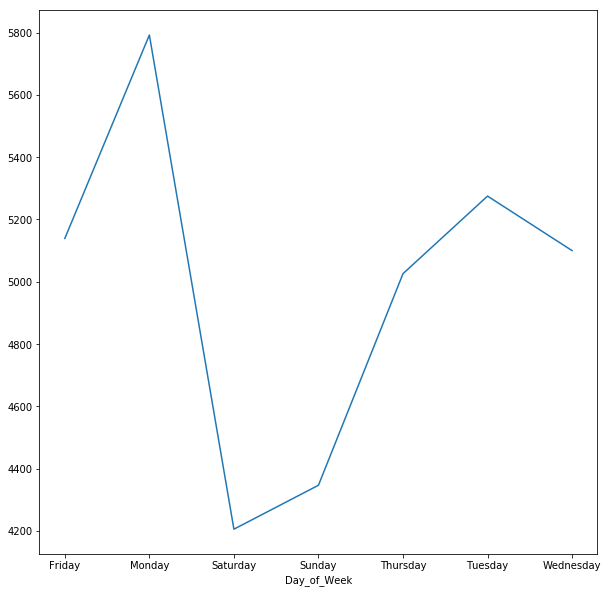

In [42]:
# starting at 0 = monday to 6 = sunday
plt.figure(figsize=(10,10))
df.groupby('Day_of_Week').size().plot(kind='line')
plt.show()

In [ ]:
# plt hist of Highest NIBRS/UCR Offense Description 



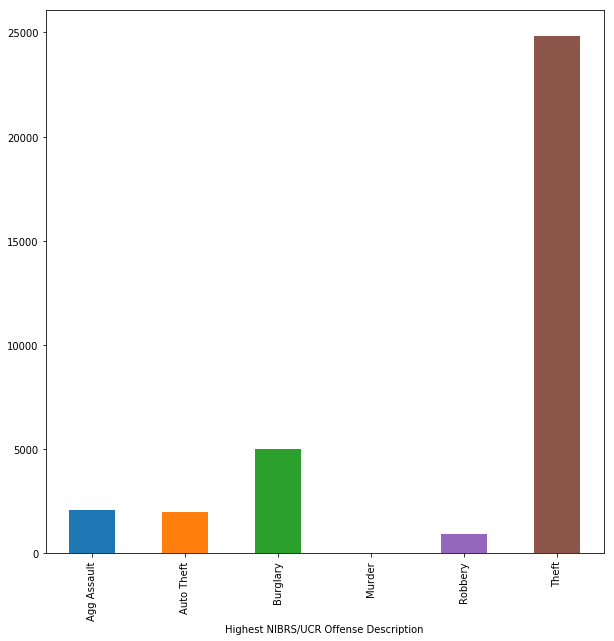

In [43]:
plt.figure(figsize=(10,10))
df.groupby('Highest NIBRS/UCR Offense Description').size().plot(kind='bar')
plt.show()

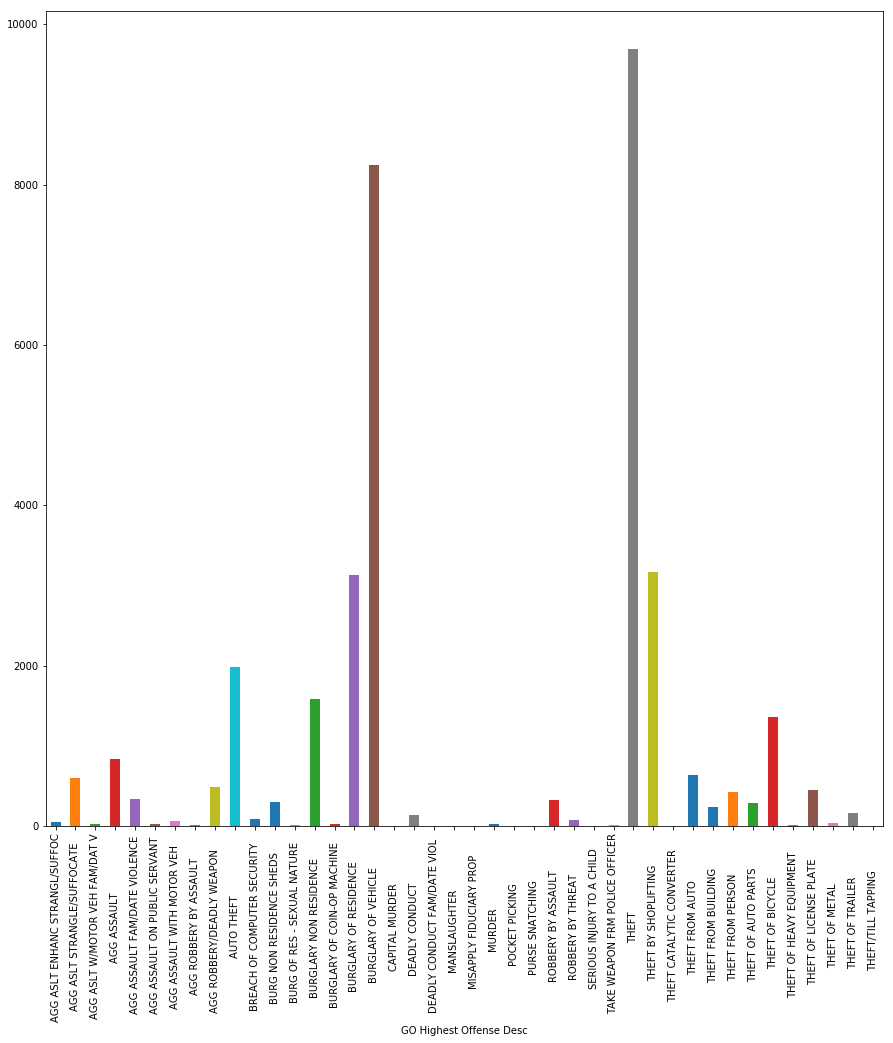

In [44]:
#GO Highest Offense Desc
plt.figure(figsize=(15,15))
df.groupby('GO Highest Offense Desc').size().plot(kind='bar')
plt.show()

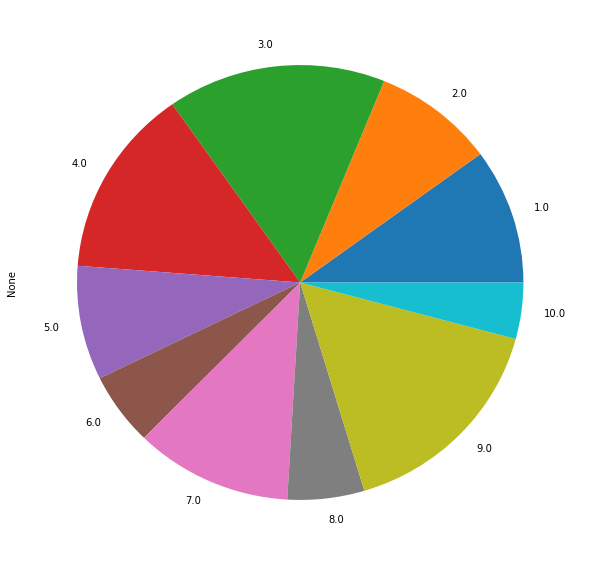

In [45]:
#   Council District
plt.figure(figsize=(10,10))
df.groupby('Council District').size().plot(kind='pie')
plt.show()

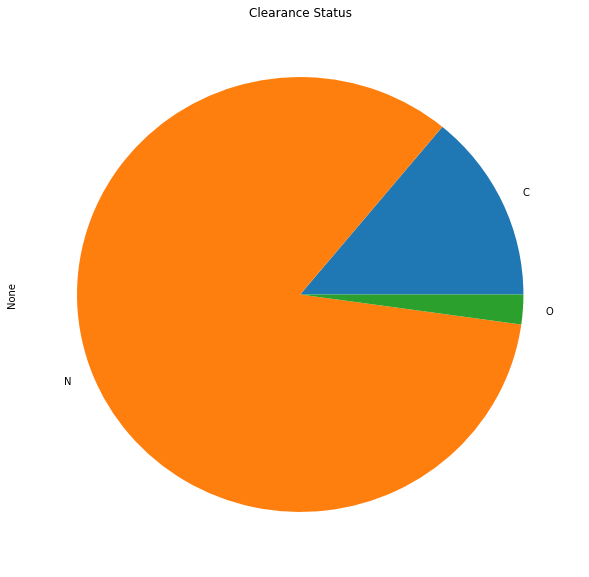

In [46]:
plt.figure(figsize=(10,10))
df.groupby('Clearance Status').size().plot(kind='pie')
plt.title('Clearance Status')
plt.show()

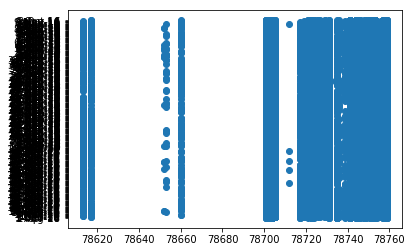

In [47]:
plt.scatter(df['GO Location Zip'],df['GO Report Date'])

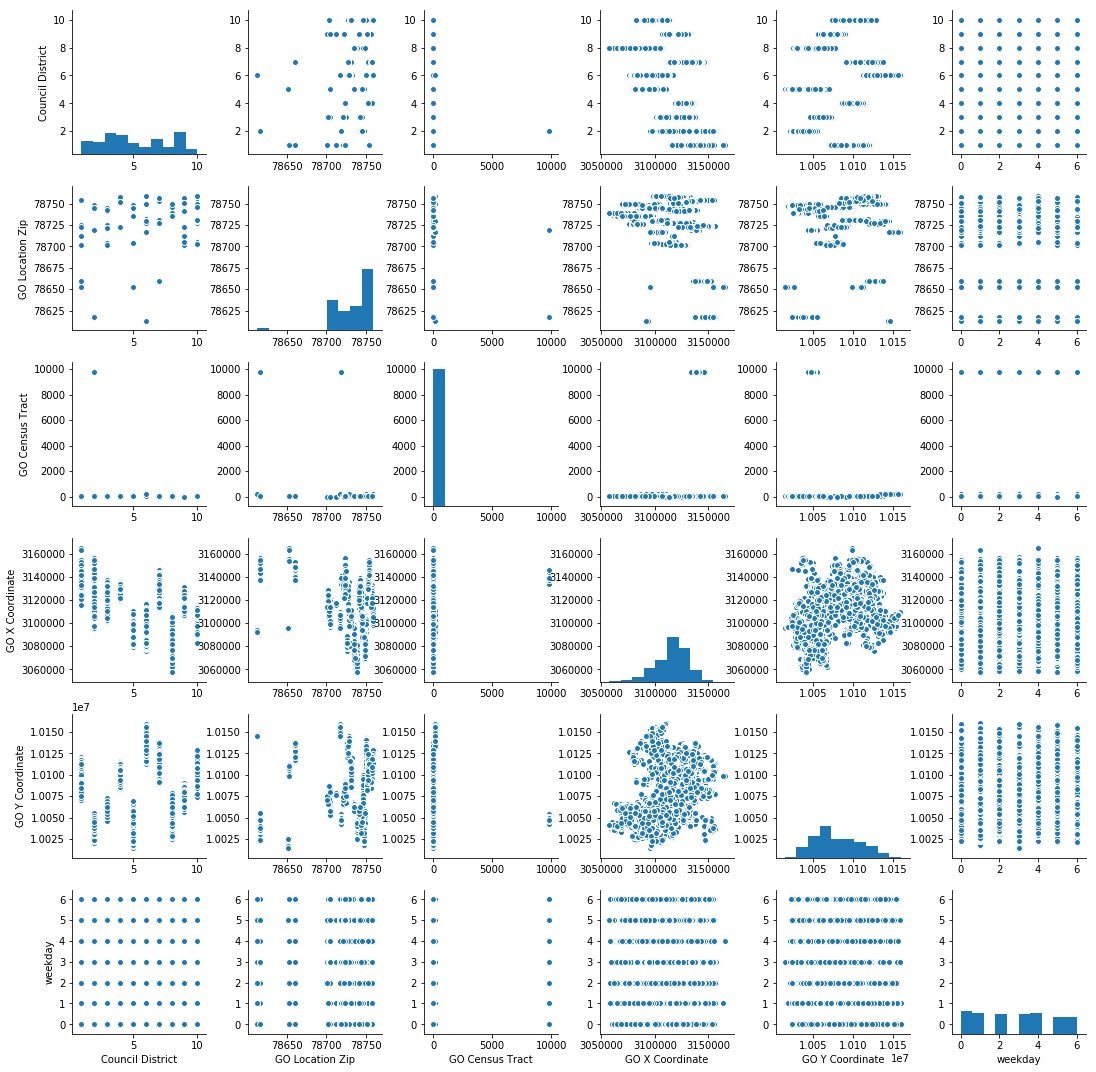

In [48]:
pair = df[['Council District','GO Location Zip','GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate','weekday']]
sns.pairplot(pair);





In [ ]:
#mouth nose angle criminal inclusion
#weather data and tax database data
# SHIT RESTAURANT LOCATION DATA via gps coordinates

# CAPSTONE PART 3

# TO DO:
## one hot encode/ get dummies of the crime highest column
## go location zip for regression with crime stats

In [49]:
df.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'new_date', 'dow', 'Day_of_Week', 'Month',
       'Year', 'Day'],
      dtype='object')

In [50]:
df_crimes = pd.get_dummies(df['GO Highest Offense Desc'])

In [51]:
df_crimes.head()

,AGG ASLT ENHANC STRANGL/SUFFOC,AGG ASLT STRANGLE/SUFFOCATE,AGG ASLT W/MOTOR VEH FAM/DAT V,AGG ASSAULT,AGG ASSAULT FAM/DATE VIOLENCE,AGG ASSAULT ON PUBLIC SERVANT,AGG ASSAULT WITH MOTOR VEH,AGG ROBBERY BY ASSAULT,AGG ROBBERY/DEADLY WEAPON,AUTO THEFT,...,THEFT FROM AUTO,THEFT FROM BUILDING,THEFT FROM PERSON,THEFT OF AUTO PARTS,THEFT OF BICYCLE,THEFT OF HEAVY EQUIPMENT,THEFT OF LICENSE PLATE,THEFT OF METAL,THEFT OF TRAILER,THEFT/TILL TAPPING
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_new = pd.concat([df, df_crimes],axis=1)
#df_new
#df_new = df.join(df_crimes)
df_new

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,...,THEFT FROM AUTO,THEFT FROM BUILDING,THEFT FROM PERSON,THEFT OF AUTO PARTS,THEFT OF BICYCLE,THEFT OF HEAVY EQUIPMENT,THEFT OF LICENSE PLATE,THEFT OF METAL,THEFT OF TRAILER,THEFT/TILL TAPPING
0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,...,0,0,0,0,0,0,0,0,0,0
1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,...,0,0,0,0,0,0,0,0,0,0
2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,...,0,0,0,0,0,0,0,0,0,0
3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,...,0,0,0,0,0,0,0,0,0,0
5,2.016111e+08,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,...,0,0,0,0,0,0,0,0,0,0
6,2.016112e+08,3.0,ROBBERY BY ASSAULT,Robbery,1-Jan-16,1601 ROYAL CREST DR ...,N,1-Nov-16,H,78741,...,0,0,0,0,0,0,0,0,0,0
7,2.016112e+08,3.0,AGG ASSAULT FAM/DATE VIOLENCE,Agg Assault,1-Jan-16,1600 WICKERSHAM LN ...,C,1-Jan-16,H,78741,...,0,0,0,0,0,0,0,0,0,0
8,2.016112e+08,5.0,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,1-Jan-16,4009 VICTORY DR ...,C,3-Feb-16,D,78704,...,0,0,0,0,0,0,0,0,0,0
9,2.016112e+08,5.0,BURGLARY NON RESIDENCE,Burglary,1-Jan-16,811 W SLAUGHTER LN ...,N,4-Feb-16,F,78748,...,0,0,0,0,0,0,0,0,0,0
10,2.016113e+08,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-16,8930 GALEWOOD DR ...,C,12-Feb-16,E,78758,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_new["Month"]=df["GO Report Date"].map(lambda x: x.split("-")[1])
df_new["Year"]=df["GO Report Date"].map(lambda x: x.split("-")[2])
df_new["Day"]=df["GO Report Date"].map(lambda x: x.split("-")[0])
df_new.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,...,THEFT FROM AUTO,THEFT FROM BUILDING,THEFT FROM PERSON,THEFT OF AUTO PARTS,THEFT OF BICYCLE,THEFT OF HEAVY EQUIPMENT,THEFT OF LICENSE PLATE,THEFT OF METAL,THEFT OF TRAILER,THEFT/TILL TAPPING
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,...,0,0,0,0,0,0,0,0,0,0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,...,0,0,0,0,0,0,0,0,0,0
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,...,0,0,0,0,0,0,0,0,0,0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,...,0,0,0,0,0,0,0,0,0,0
5,201611148.0,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_new.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'new_date', 'dow', 'Day_of_Week', 'Month',
       'Year', 'Day', 'AGG ASLT ENHANC STRANGL/SUFFOC',
       'AGG ASLT STRANGLE/SUFFOCATE   ', 'AGG ASLT W/MOTOR VEH FAM/DAT V',
       'AGG ASSAULT                   ', 'AGG ASSAULT FAM/DATE VIOLENCE ',
       'AGG ASSAULT ON PUBLIC SERVANT ', 'AGG ASSAULT WITH MOTOR VEH    ',
       'AGG ROBBERY BY ASSAULT        ', 'AGG ROBBERY/DEADLY WEAPON     ',
       'AUTO THEFT                    ', 'BREACH OF COMPUTER SECURITY   ',
       'BURG NON RESIDENCE SHEDS      ', 'BURG OF RES - SEXUAL NATURE   ',
       'BURGLARY NON RESIDENCE        ', 'BURGLARY OF COIN-OP MACHINE   ',
       'BURGLARY OF RESIDENCE         ', 'BURGLARY OF VEHICLE 

In [55]:
corr = df_new.corr()

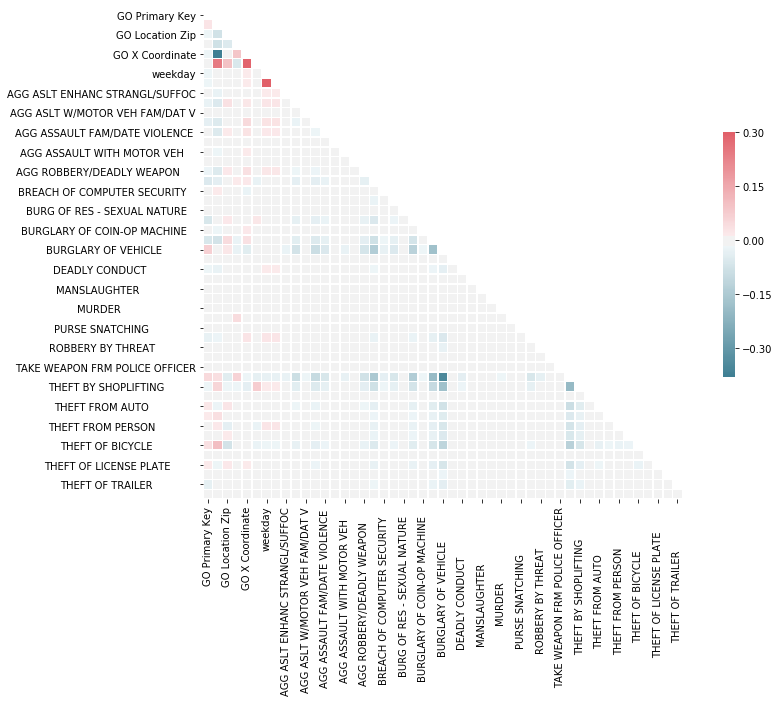

In [56]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [57]:
corr = df.corr()

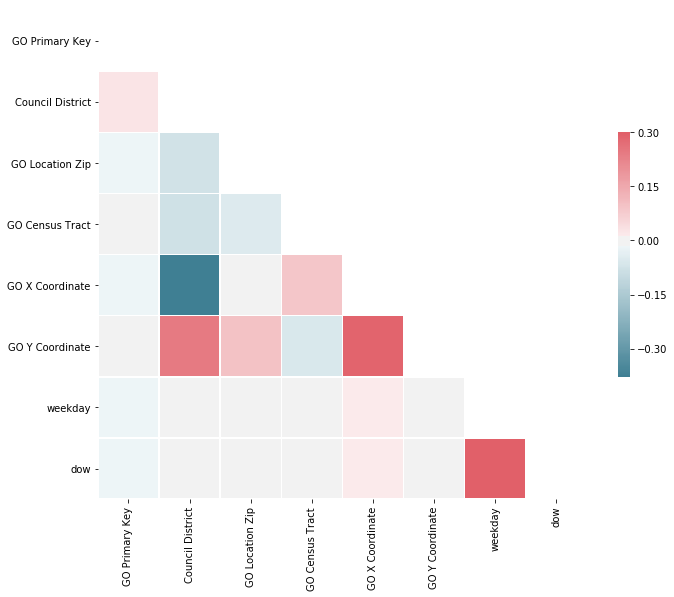

In [58]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [59]:
df_new.reset_index()

,index,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,...,THEFT FROM AUTO,THEFT FROM BUILDING,THEFT FROM PERSON,THEFT OF AUTO PARTS,THEFT OF BICYCLE,THEFT OF HEAVY EQUIPMENT,THEFT OF LICENSE PLATE,THEFT OF METAL,THEFT OF TRAILER,THEFT/TILL TAPPING
0,0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,...,0,0,0,0,0,0,0,0,0,0
1,1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,...,0,0,0,0,0,0,0,0,0,0
2,2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,...,0,0,0,0,0,0,0,0,0,0
3,3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,...,0,0,0,0,0,0,0,0,0,0
4,5,2.016111e+08,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,...,0,0,0,0,0,0,0,0,0,0
5,6,2.016112e+08,3.0,ROBBERY BY ASSAULT,Robbery,1-Jan-16,1601 ROYAL CREST DR ...,N,1-Nov-16,H,...,0,0,0,0,0,0,0,0,0,0
6,7,2.016112e+08,3.0,AGG ASSAULT FAM/DATE VIOLENCE,Agg Assault,1-Jan-16,1600 WICKERSHAM LN ...,C,1-Jan-16,H,...,0,0,0,0,0,0,0,0,0,0
7,8,2.016112e+08,5.0,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,1-Jan-16,4009 VICTORY DR ...,C,3-Feb-16,D,...,0,0,0,0,0,0,0,0,0,0
8,9,2.016112e+08,5.0,BURGLARY NON RESIDENCE,Burglary,1-Jan-16,811 W SLAUGHTER LN ...,N,4-Feb-16,F,...,0,0,0,0,0,0,0,0,0,0
9,10,2.016113e+08,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-16,8930 GALEWOOD DR ...,C,12-Feb-16,E,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y = df_new.index

# DF of simplified crime list

In [108]:

df_crime_simple = pd.get_dummies(df['Highest NIBRS/UCR Offense Description'])

In [109]:

df_crime_simple.head()

,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,0,1
5,1,0,0,0,0,0


In [110]:


df_new_1 = pd.concat([df, df_crime_simple],axis=1)

In [111]:
df_new_1.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,...,Day_of_Week,Month,Year,Day,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,...,Friday,Jan,16,1,1,0,0,0,0,0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,...,Friday,Jan,16,1,0,0,0,0,0,1
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,...,Friday,Jan,16,1,0,0,0,0,1,0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,...,Friday,Jan,16,1,0,0,0,0,0,1
5,201611148.0,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,...,Friday,Jan,16,1,1,0,0,0,0,0


In [112]:
df_new_1.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'new_date', 'dow', 'Day_of_Week', 'Month',
       'Year', 'Day', 'Agg Assault', 'Auto Theft', 'Burglary', 'Murder',
       'Robbery', 'Theft'],
      dtype='object')

In [113]:

data1 = df_new_1[['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'Month', 'Year', 'Day', 'new_date', 'dow',
       'Day_of_Week', 'Agg Assault', 'Auto Theft', 'Burglary', 'Murder',
       'Robbery', 'Theft']]
                
data1.corr()


,GO Primary Key,Council District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,dow,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
GO Primary Key,1.000000,0.027908,-0.017978,-0.004546,-0.016259,-0.001711,-0.015707,-0.015707,-0.051613,-0.051667,-0.084065,-0.001252,-0.035194,0.131164
Council District,0.027908,1.000000,-0.075386,-0.078460,-0.378378,0.245788,-0.008438,-0.008438,-0.094493,-0.037242,-0.060238,-0.012769,-0.049092,0.133396
GO Location Zip,-0.017978,-0.075386,1.000000,-0.049368,-0.001842,0.097191,-0.008349,-0.008349,0.027331,0.005024,0.045998,0.003579,0.008702,-0.055859
GO Census Tract,-0.004546,-0.078460,-0.049368,1.000000,0.089960,-0.055193,-0.006523,-0.006523,-0.015717,0.016109,-0.023048,-0.002236,-0.011364,0.022006
GO X Coordinate,-0.016259,-0.378378,-0.001842,0.089960,1.000000,0.291506,0.015784,0.015784,0.064209,0.018627,0.022425,0.015374,0.047068,-0.078133
GO Y Coordinate,-0.001711,0.245788,0.097191,-0.055193,0.291506,1.000000,-0.002882,-0.002882,-0.004700,-0.024169,0.005282,0.005853,0.006182,0.008184
weekday,-0.015707,-0.008438,-0.008349,-0.006523,0.015784,-0.002882,1.000000,1.000000,0.048753,0.009918,-0.013912,0.006649,0.035400,-0.032722
dow,-0.015707,-0.008438,-0.008349,-0.006523,0.015784,-0.002882,1.000000,1.000000,0.048753,0.009918,-0.013912,0.006649,0.035400,-0.032722
Agg Assault,-0.051613,-0.094493,0.027331,-0.015717,0.064209,-0.004700,0.048753,0.048753,1.000000,-0.061995,-0.103455,-0.007399,-0.041296,-0.396716
Auto Theft,-0.051667,-0.037242,0.005024,0.016109,0.018627,-0.024169,0.009918,0.009918,-0.061995,1.000000,-0.100845,-0.007212,-0.040255,-0.386708


In [114]:
df_new_1.isnull().sum()

GO Primary Key                           0
Council District                         0
GO Highest Offense Desc                  0
Highest NIBRS/UCR Offense Description    0
GO Report Date                           0
GO Location                              0
Clearance Status                         0
Clearance Date                           0
GO District                              0
GO Location Zip                          0
GO Census Tract                          0
GO X Coordinate                          0
GO Y Coordinate                          0
weekday                                  0
new_date                                 0
dow                                      0
Day_of_Week                              0
Month                                    0
Year                                     0
Day                                      0
Agg Assault                              0
Auto Theft                               0
Burglary                                 0
Murder     

In [115]:
#df.dropna(subset = ['column_name'])
df_new_1.dropna(subset = ['Council District'],how='all', inplace = True)

In [116]:

#df_new_1.drop('Clearance Date',axis=1, inplace=True)
df_new_1.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,...,Day_of_Week,Month,Year,Day,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,...,Friday,Jan,16,1,1,0,0,0,0,0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,...,Friday,Jan,16,1,0,0,0,0,0,1
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,...,Friday,Jan,16,1,0,0,0,0,1,0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,...,Friday,Jan,16,1,0,0,0,0,0,1
5,201611148.0,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,...,Friday,Jan,16,1,1,0,0,0,0,0


In [117]:
df_new_1.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'new_date', 'dow', 'Day_of_Week', 'Month',
       'Year', 'Day', 'Agg Assault', 'Auto Theft', 'Burglary', 'Murder',
       'Robbery', 'Theft'],
      dtype='object')

In [118]:
df_new_1.corr()

,GO Primary Key,Council District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,dow,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
GO Primary Key,1.000000,0.027908,-0.017978,-0.004546,-0.016259,-0.001711,-0.015707,-0.015707,-0.051613,-0.051667,-0.084065,-0.001252,-0.035194,0.131164
Council District,0.027908,1.000000,-0.075386,-0.078460,-0.378378,0.245788,-0.008438,-0.008438,-0.094493,-0.037242,-0.060238,-0.012769,-0.049092,0.133396
GO Location Zip,-0.017978,-0.075386,1.000000,-0.049368,-0.001842,0.097191,-0.008349,-0.008349,0.027331,0.005024,0.045998,0.003579,0.008702,-0.055859
GO Census Tract,-0.004546,-0.078460,-0.049368,1.000000,0.089960,-0.055193,-0.006523,-0.006523,-0.015717,0.016109,-0.023048,-0.002236,-0.011364,0.022006
GO X Coordinate,-0.016259,-0.378378,-0.001842,0.089960,1.000000,0.291506,0.015784,0.015784,0.064209,0.018627,0.022425,0.015374,0.047068,-0.078133
GO Y Coordinate,-0.001711,0.245788,0.097191,-0.055193,0.291506,1.000000,-0.002882,-0.002882,-0.004700,-0.024169,0.005282,0.005853,0.006182,0.008184
weekday,-0.015707,-0.008438,-0.008349,-0.006523,0.015784,-0.002882,1.000000,1.000000,0.048753,0.009918,-0.013912,0.006649,0.035400,-0.032722
dow,-0.015707,-0.008438,-0.008349,-0.006523,0.015784,-0.002882,1.000000,1.000000,0.048753,0.009918,-0.013912,0.006649,0.035400,-0.032722
Agg Assault,-0.051613,-0.094493,0.027331,-0.015717,0.064209,-0.004700,0.048753,0.048753,1.000000,-0.061995,-0.103455,-0.007399,-0.041296,-0.396716
Auto Theft,-0.051667,-0.037242,0.005024,0.016109,0.018627,-0.024169,0.009918,0.009918,-0.061995,1.000000,-0.100845,-0.007212,-0.040255,-0.386708


In [119]:
# lets see if the day of the week is correlated to murder
df_new_1['weekday'].corr(df_new_1['Murder'])

0.0066485123223155376

In [120]:
df_new_1['weekday'].corr(df_new_1['Theft'])

-0.03272159814288679

In [121]:
import statsmodels.api as sm # import statsmodels 

In [122]:
X = df_new_1[['GO Location Zip']]
#X = df_new_1[['Theft']]
y = df_new_1[['Theft']]

model = sm.OLS(X,y).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        GO Location Zip   R-squared:                   45747.296
Model:                            OLS   Adj. R-squared:              45748.607
Method:                 Least Squares   F-statistic:                -3.488e+04
Date:                Mon, 11 Dec 2017   Prob (F-statistic):               1.00
Time:                        10:58:28   Log-Likelihood:            -4.2106e+05
No. Observations:               34885   AIC:                         8.421e+05
Df Residuals:                   34884   BIC:                         8.421e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Theft       7.873e+04    267.979    293.798      0.000    7.82e+04    7.93e+04
==============================================================================
Omnibus:                    20314.939   Durbin-Watson:                   0.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6936.472
Skew:                           0.937   Prob(JB):                         0.00
Kurtosis:                       1.879   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
from sklearn import linear_model

In [171]:

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [172]:
predictions = lm.predict(X)
print(predictions)[0:5]

[[ 0.70983474]
 [ 0.74332558]
 [ 0.6921043 ]
 ..., 
 [ 0.72165504]
 [ 0.70293957]
 [ 0.73938548]]


TypeError: 'NoneType' object is not subscriptable

In [173]:
lm.score(X,y)

0.0031201756912097034

In [176]:
# trying logistic regression to classify the zips

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)



In [177]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


/Users/Owner/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [182]:
y_pred = LogReg.predict(X_test)


In [183]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[   0, 2998],
       [   0, 7468]])

In [184]:


print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2998
          1       0.71      1.00      0.83      7468

avg / total       0.51      0.71      0.59     10466



/Users/Owner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
y_predict=model.predict(X_test)


In [132]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


In [138]:
# working on model scoring from google results:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
print(("Logloss: %.3f (%.3f)") % (results.mean(), results.std()))

Logloss: -0.599 (0.017)


/Users/Owner/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Owner/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Owner/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Owner/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [101]:
print ("Logloss : %f" % metrics.log_loss())
#eval_y are your "target" columns from the copied part of the testfile.
#prediction is your predict_proba on the eval_x ( the feature columns of the same file )

ValueError: Found input variables with inconsistent numbers of samples: [11513, 23372]

In [85]:
df_new_1.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'new_date', 'dow', 'Day_of_Week', 'Month',
       'Year', 'Day', 'Agg Assault', 'Auto Theft', 'Burglary', 'Murder',
       'Robbery', 'Theft'],
      dtype='object')

In [186]:
#creating differentiated data 
df_X = pd.DataFrame(df_new_1, columns = ['GO Primary Key', 'Council District',
        'GO Census Tract', 'weekday', 'Day','GO X Coordinate', 'GO Y Coordinate',
        'dow',  'Agg Assault', 'Auto Theft','Burglary', 'Murder', 'Robbery', 'Theft', ])

#took out 'new_date','Month','GO District',  'GO Location', 'GO Highest Offense Desc',
#'Highest NIBRS/UCR Offense Description',

In [187]:
y = df_new_1['GO Location Zip']

In [188]:
#doing a linear regression using the new dataset....Do i need to TTS here??
X_train, X_test, y_train, y_test = train_test_split(df_X, y,
                                                   test_size=0.33,
                                                    random_state=50)

In [189]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
#scaling test
ss.fit(X_test)
X_test_scaled = ss.transform(X_test)

In [191]:
lr = LogisticRegression()
log_model = lr.fit(df_X, y)
print(log_model.score(df_X, y))

0.0912713200516


In [192]:
lm = LinearRegression()
model = lm.fit(X_train_scaled, y_train)
print(model.score(X_test_scaled, y_test))

0.0374728496238


In [193]:
lasso = LassoCV(cv = 10)
lasso.fit(X_train_scaled, y_train)

lasso.score(X_test_scaled, y_test)
# 

0.03720183417365952

In [89]:
ridge=RidgeCV() 
ridge.fit(X_train_scaled, y_train)
print(ridge.score(X_test_scaled,y_test))

0.0374649324513


In [ ]:
en=ElasticNet() 
en.fit(X_train_scaled, y_train)
print(en.score(X_test_scaled,y_test))

In [214]:
# n_estimators determines forrest size
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada_params = {
    'n_estimators': [10,25,50],
   'base_estimator__max_depth':range(1,5),
    'base_estimator__max_features': ['auto','log2',None]
             }
ada_model = GridSearchCV(ada, param_grid = ada_params)
ada_model.fit(X_train_scaled,y_train)
print('best score:', ada_model.best_score_)
print('best params:',ada_model.best_params_)
print('test score:',ada_model.score(ss.fit_transform(X_test),y_test))

/Users/Owner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


best score: 0.89816874893
best params: {'base_estimator__max_depth': 4, 'base_estimator__max_features': None, 'n_estimators': 50}
test score: 0.842525840354


In [231]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [232]:
print(knn.score(X_test, y_test))


0.728828281074


In [95]:
 df_new_1['GO Location Zip'].value_counts()
    

78741    3121
78753    2904
78704    2380
78758    2281
78745    2108
78701    1963
78723    1960
78744    1807
78702    1497
78748    1273
78752    1229
78759    1117
78705    1099
78757    1048
78751     883
78746     741
78749     738
78703     650
78729     513
78724     506
78731     497
78727     494
78721     475
78754     387
78756     320
78613     312
78750     308
78717     280
78735     270
78617     258
78722     248
78747     212
78726     205
78719     156
78660     154
78739     143
78736     114
78725      68
78742      54
78730      46
78653      39
78652      16
78712       5
78728       4
78732       1
78737       1
Name: GO Location Zip, dtype: int64

In [96]:
df_new_1['GO Location Zip'].shape


(34885,)

In [97]:
3282/36492 


0.08993752055244986

In [197]:
df_new_1['GO Y Coordinate'].mean()

10079681.284850223

In [198]:
df_new_1['GO X Coordinate'].mean()

3115880.2400745307

In [ ]:
from sklearn.metrics import mean_squared_error
from math import *


In [249]:
model = PassiveAggressiveClassifier(max_iter=1,random_state=1975)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
rms=sqrt(mean_squared_error(y_test, y_predict))
rms

print(model.score(X_test, y_test))

0.00825154173543


# DTR WITH IT

In [150]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y,
                                                   test_size=0.33,
                                                    random_state=50)

In [151]:
dtr = DecisionTreeRegressor(max_depth=None)
dtr.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [154]:
from sklearn.model_selection import cross_val_score


In [155]:
dtr_scores = cross_val_score(dtr, X_train, y_train, cv=4)
print(dtr_scores, np.mean(dtr_scores))


[ 1.  1.  1.  1.] 1.0


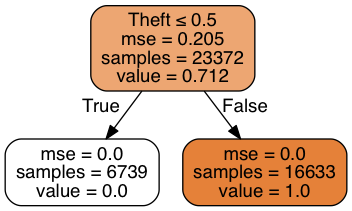

In [162]:
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz



dot_data = StringIO()  

export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# DTC

In [163]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y,
                                                   test_size=0.33,
                                                    random_state=50)

In [164]:
dtc = DecisionTreeClassifier(max_depth=None)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [165]:
from sklearn.model_selection import cross_val_score

In [166]:
dtc_scores = cross_val_score(dtc, X_train, y_train, cv=4)
print(dtr_scores, np.mean(dtr_scores))

[ 1.  1.  1.  1.] 1.0


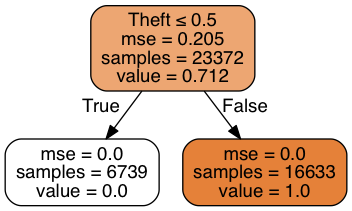

In [167]:
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz



dot_data = StringIO()  

export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## NEXT STEPS:

creating summary columns that have # of crimes per district calculation and classifying based on that


# ideas to hypothesis test: crimes for days of week?
# 
# new df --> sum the number of each crime in each district
#
# 

In [105]:
#df['preTestScore'].groupby([df['regiment'], df['company']]).mean().unstack()
df_new_1.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'new_date', 'dow', 'Day_of_Week', 'Month',
       'Year', 'Day', 'Agg Assault', 'Auto Theft', 'Burglary', 'Murder',
       'Robbery', 'Theft'],
      dtype='object')

In [123]:
df_new_1.groupby(['Highest NIBRS/UCR Offense Description','GO District']).size()

Highest NIBRS/UCR Offense Description  GO District
Agg Assault                            A               154
                                       B               117
                                       C               287
                                       D               187
                                       E               375
                                       F               288
                                       G               128
                                       H               257
                                       I               293
Auto Theft                             88                1
                                       A               176
                                       AP               18
                                       B               193
                                       C               156
                                       D               287
                                       E               300
     

In [124]:
df_new_1.groupby(['Highest NIBRS/UCR Offense Description','GO District','Month']).size()

Highest NIBRS/UCR Offense Description  GO District  Month
Agg Assault                            A            Apr       18
                                                    Aug        7
                                                    Dec       11
                                                    Feb       18
                                                    Jan       13
                                                    Jul       10
                                                    Jun       17
                                                    Mar       13
                                                    May       14
                                                    Nov        6
                                                    Oct       14
                                                    Sep       13
                                       B            Apr       10
                                                    Aug        9
                                

In [196]:
# with this I now have a grouping of the total crimes per each council district 
df_crimes = pd.get_dummies(df_new_1, columns=['Highest NIBRS/UCR Offense Description']).groupby(['GO District'], as_index=False).sum()

In [171]:

df_crimes.columns

Index(['GO District', 'GO Primary Key', 'Council District', 'GO Location Zip',
       'GO Census Tract', 'GO X Coordinate', 'GO Y Coordinate', 'weekday',
       'dow', 'Agg Assault', 'Auto Theft', 'Burglary', 'Murder', 'Robbery',
       'Theft', 'Highest NIBRS/UCR Offense Description_Agg Assault',
       'Highest NIBRS/UCR Offense Description_Auto Theft',
       'Highest NIBRS/UCR Offense Description_Burglary',
       'Highest NIBRS/UCR Offense Description_Murder',
       'Highest NIBRS/UCR Offense Description_Robbery',
       'Highest NIBRS/UCR Offense Description_Theft'],
      dtype='object')

In [172]:

df_crimes.head(100)

,GO District,GO Primary Key,Council District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,dow,Agg Assault,...,Burglary,Murder,Robbery,Theft,Highest NIBRS/UCR Offense Description_Agg Assault,Highest NIBRS/UCR Offense Description_Auto Theft,Highest NIBRS/UCR Offense Description_Burglary,Highest NIBRS/UCR Offense Description_Murder,Highest NIBRS/UCR Offense Description_Robbery,Highest NIBRS/UCR Offense Description_Theft
0,88,2.016501e+10,2.0,78617,24.35,3.146290e+06,1.003074e+07,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,A,6.805661e+13,26052.0,298398205,307851.52,1.177816e+10,3.838674e+10,10533,10533,154.0,...,539.0,2.0,62.0,2857.0,154.0,176.0,539.0,2.0,62.0,2857.0
2,AP,2.595380e+12,308.0,12122726,1509200.00,4.833564e+08,1.547349e+09,412,412,0.0,...,1.0,0.0,0.0,135.0,0.0,18.0,1.0,0.0,0.0,135.0
3,B,7.637356e+13,36616.0,327426455,34824.51,1.295271e+10,4.195093e+10,11327,11327,117.0,...,505.0,2.0,45.0,3297.0,117.0,193.0,505.0,2.0,45.0,3297.0
4,C,4.603134e+13,5428.0,208279312,40323.39,8.287757e+09,2.666237e+10,7508,7508,287.0,...,472.0,5.0,86.0,1640.0,287.0,156.0,472.0,5.0,86.0,1640.0
5,D,9.019539e+13,29738.0,396792324,91941.60,1.561186e+10,5.069137e+10,13962,13962,187.0,...,663.0,2.0,66.0,3835.0,187.0,287.0,663.0,2.0,66.0,3835.0
6,E,7.398954e+13,19430.0,346742159,80373.77,1.378516e+10,4.451645e+10,12323,12323,375.0,...,768.0,8.0,185.0,2767.0,375.0,300.0,768.0,8.0,185.0,2767.0
7,F,7.214528e+13,13331.0,327107745,95954.52,1.289048e+10,4.170365e+10,11664,11664,288.0,...,668.0,2.0,82.0,2847.0,288.0,267.0,668.0,2.0,82.0,2847.0
8,G,4.547143e+13,18932.0,198170069,26941.52,7.844408e+09,2.535656e+10,7601,7601,128.0,...,140.0,2.0,106.0,2064.0,128.0,78.0,140.0,2.0,106.0,2064.0
9,H,6.925048e+13,14831.0,311374723,127219.25,1.235021e+10,3.977627e+10,11254,11254,257.0,...,657.0,2.0,137.0,2594.0,257.0,308.0,657.0,2.0,137.0,2594.0


In [193]:
df_crimes = pd.get_dummies(df_new_1, columns=['Highest NIBRS/UCR Offense Description']).groupby(['GO District','Month'], as_index=False).sum()

In [194]:
#summary of crimes by month
df_crimes.head(1000)

,GO District,Month,GO Primary Key,Council District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,dow,...,Burglary,Murder,Robbery,Theft,Highest NIBRS/UCR Offense Description_Agg Assault,Highest NIBRS/UCR Offense Description_Auto Theft,Highest NIBRS/UCR Offense Description_Burglary,Highest NIBRS/UCR Offense Description_Murder,Highest NIBRS/UCR Offense Description_Robbery,Highest NIBRS/UCR Offense Description_Theft
0,88,Mar,2.016501e+10,2.0,78617,24.35,3.146290e+06,1.003074e+07,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,A,Apr,6.412152e+12,2443.0,27872420,26313.67,1.100439e+09,3.585257e+09,967,967,...,45.0,0.0,7.0,270.0,18.0,14.0,45.0,0.0,7.0,270.0
2,A,Aug,6.311337e+12,2137.0,24642389,28930.72,9.726572e+08,3.170459e+09,815,815,...,42.0,0.0,3.0,238.0,7.0,23.0,42.0,0.0,3.0,238.0
3,A,Dec,6.835778e+12,2325.0,26688512,27708.27,1.053363e+09,3.433680e+09,1037,1037,...,40.0,1.0,13.0,259.0,11.0,15.0,40.0,1.0,13.0,259.0
4,A,Feb,3.853617e+12,2291.0,25746098,26545.60,1.016144e+09,3.311791e+09,908,908,...,43.0,0.0,5.0,249.0,18.0,12.0,43.0,0.0,5.0,249.0
5,A,Jan,3.821308e+12,2291.0,25904491,24419.11,1.022821e+09,3.332015e+09,977,977,...,49.0,0.0,5.0,245.0,13.0,17.0,49.0,0.0,5.0,245.0
6,A,Jul,6.149993e+12,2088.0,24013506,25431.26,9.481641e+08,3.089234e+09,916,916,...,48.0,1.0,5.0,229.0,10.0,12.0,48.0,1.0,5.0,229.0
7,A,Jun,6.028995e+12,2005.0,23540508,25659.46,9.291157e+08,3.028645e+09,823,823,...,36.0,0.0,6.0,227.0,17.0,13.0,36.0,0.0,6.0,227.0
8,A,Mar,3.438237e+12,1879.0,21573542,20396.51,8.518676e+08,2.775137e+09,662,662,...,27.0,0.0,3.0,223.0,13.0,8.0,27.0,0.0,3.0,223.0
9,A,May,6.775055e+12,2268.0,26454319,27808.46,1.044255e+09,3.403260e+09,918,918,...,50.0,0.0,5.0,255.0,14.0,12.0,50.0,0.0,5.0,255.0


In [195]:
df_crimes.columns

Index(['GO District', 'Month', 'GO Primary Key', 'Council District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'dow', 'Agg Assault', 'Auto Theft',
       'Burglary', 'Murder', 'Robbery', 'Theft',
       'Highest NIBRS/UCR Offense Description_Agg Assault',
       'Highest NIBRS/UCR Offense Description_Auto Theft',
       'Highest NIBRS/UCR Offense Description_Burglary',
       'Highest NIBRS/UCR Offense Description_Murder',
       'Highest NIBRS/UCR Offense Description_Robbery',
       'Highest NIBRS/UCR Offense Description_Theft'],
      dtype='object')

In [199]:
# https://github.com/sflender/crime/blob/master/crime.ipynb

In [201]:
df_new_1.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'new_date', 'dow', 'Day_of_Week', 'Month',
       'Year', 'Day', 'Agg Assault', 'Auto Theft', 'Burglary', 'Murder',
       'Robbery', 'Theft'],
      dtype='object')

In [198]:
num2month={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [199]:
def prep_data(df_new_1, istest):
    if(istest==0):
        le_crime = preprocessing.LabelEncoder()
        crime = le_crime.fit_transform(df_new_1['Highest NIBRS/UCR Offense Description'])
    
    #Get dummied weekdays, districts, and months
    days = pd.get_dummies(df_new_1.dow)
    district = pd.get_dummies(df_new_1['GO District'])
    month = pd.get_dummies(df_new_1.new_date.dt.month.map(num2month))
    
    new_data = pd.concat([month, days, district], axis=1)
    #new_data['X']=(df_new_1.X)
    #new_data['Y']=(df_new_1.Y)
    
    if(istest==0):
        new_data['crime']=crime

train_proc = prep_data(df_new_1,0)
test_proc = prep_data(df_new_1,1)        
        

In [200]:
features = ['1','2','3','4','5','6','7','8','9','10','11','12',
            'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 
            '88', 'A', 'AP', 'B','C', 'D', 'E', 'F', 'G', 'H','I'
            #'X','Y'
           ] 
 
training, validation = train_test_split(features, train_size=.67)
model = BernoulliNB()
model.fit(training[features], df_new_1['GO Highest Offense Desc'])
predicted = np.array(model.predict_proba(validation[features]))
log_loss(validation[validation['GO Highest Offense Desc']], predicted)

TypeError: list indices must be integers or slices, not list

to do:
    make a rolling cumulative sum for the theft column for each month
    

In [223]:
#weekday vs weekend for crime


# for every instance of theft in df -- binary classifier for weekend/weekday 

# then roll to each type of theft for each weekday/weekend

In [224]:
#assumption of # of specific crime sets for each specific day